In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
# 显示图像
def img_show(img):
    if len(img.shape) == 3:
        if img.shape[-1]==3:
            b,g,r = cv2.split(img)
            img = cv2.merge([r,g,b])
        elif img.shape[-1]==4:
            b,g,r,a = cv2.split(img)
            img = img
        plt.imshow(img)
    elif len(img.shape) == 2:
        plt.imshow(img)

# 5.1 缩放

In [3]:
# opencv中使用cv2.resize()函数实现对图像的缩放
# dst = cv2.resize(src,dsize[,fx[,fy[,interpolation]]])
# dst：输出图像，类型与src形同，大小为dsize（当该值为0时），或者可以通过src.size()、fx、fy计算得到
# dsize：输出图像大小
# fx：水平方向的缩放比例
# fy：垂直方向的缩放比例
# interpolation：插值方式（见书P106）

# 目标图像大小可通过参数dsize或参数fx和fy二者之一来指定
# 1.通过dsize指定：
# 如果指定了dsize的值，则无论是否指定fx和fy，都有参数dsize决定目标图像大小
# dsize参数第一个参数为图像宽，第二个参数为图像高
# 指定dsize时:
# x方向缩放大小（fx）为：（double）dsize.width/src.cols
# y方向缩放大小（fy）为：（double）dsize.height/src.rows

# 2.通过参数fx和fy指定：
# 若dsize参数为None，则目标图像大小通过参数fx和fy来决定,此时目标图像大小为：
# dsize = Size(round(fx*src.cols),round(fy*src.rows))

# 插值：在图像进行几何处理时，给无法直接通过映射得到值的像素点赋值
# 如图像放大2倍，必然有写无法映射到的像素点，插值决定了如何确定它们的值；还有对于非整数映射值的处理
# 当缩小图片时，使用区域插值方式（INTER_AREA）能够得到较好结果
# 当放大图片时，使用三次样条插值（INTER_CUBIC）方式和双线性插值（INTER_LINEAR）方式都能取得较好结果
# 三次样条插值方式速度较慢，双线性插值方式速度相对较快且结果并不逊色

In [8]:
# 使用函数cv2.resize()对一个数组进行简单缩放
img = np.ones([2,4,3],dtype=np.uint8)
size = img.shape[:2]
rst = cv2.resize(img,size)
print("img shape:",img.shape)
print("img\n",img)
print("rst shape:",rst.shape)
print("rst\n",rst)
# 由此可看出cv2.resize()函数的dsize参数与图像的shape属性在行列上顺序是相反的

img shape: (2, 4, 3)
img
 [[[1 1 1]
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  [1 1 1]]]
rst shape: (4, 2, 3)
rst
 [[[1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]]]


img.shape = (565, 500, 3)
rst.shape = (282, 450, 3)


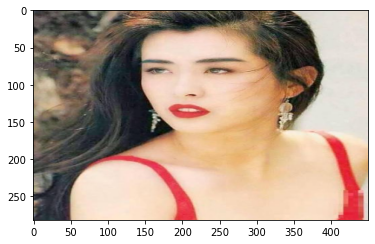

In [13]:
# dsize参数实现简单的图像缩放
wzx = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg")
rows,cols = wzx.shape[:2]
size = (int(cols*0.9), int(rows*0.5))
rst = cv2.resize(wzx,size)
print("img.shape =",wzx.shape)
print("rst.shape =",rst.shape)
img_show(rst)

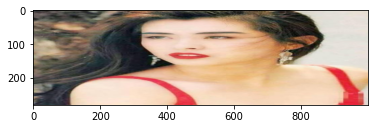

In [14]:
# fx，fy参数实现图像缩放
wzx = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg")
rst = cv2.resize(wzx,None,fx=2,fy=0.5)
img_show(rst)

# 5.2 翻转

In [15]:
# opencv中使用cv2.flip()函数实现图像翻转
# dst = cv2.flip(src,flipCode)
# dst：与愿图像同大小，同类型
# src：输入图像
# flipCode：旋转类型（0：绕x轴旋转；正数：绕y轴旋转；负数：绕x，y轴同时翻转）

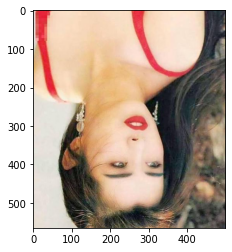

In [19]:
# 使用cv2.flip()完成图像的翻转
wzx = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg")
x = cv2.flip(wzx,0)
y = cv2.flip(wzx,1)
xy = cv2.flip(wzx,-1)
img_show(xy)

# 5.3 仿射

In [20]:
# 仿射变换：图像通过一系列几何变换实现平移、旋转等操作。该变换能够保持图像的平直性和平行性
# 平直性：图像经过仿射变换后直线仍然是直线
# 平行性：图像完成仿射变换后平行线仍然是平行线

# opencv中仿射函数为cv2.warpAffine()，其通过一个变换矩阵（映射矩阵）M实现变换，具体为：
# dst(x,y) = src(M11x+M12y+M13, M13x+M22y+M23)

# dst = cv2.warpAffine(src,M,dsize[,flages[,borderMode[,borderValue]]])
# dst：输出图像，与原图像同类型，大小由dsize决定
# src：输入图像
# M：2*3的变换矩阵，不同的变换矩阵，实现不同的仿射变换
# dsize：输出图片尺寸大小
# flags：插值方法，默认INTER_LINEAR，当置为WAEP_INVERSE_MAP时，意味着M是逆变换类型，实现图像从dst到src的逆变换，见书P106
# borderMode：边类型，默认BORDER_CONSTANT，当值为BORDER_TRANSARENT时，意味着目标图像内值不做改变，这些值对应原始图像内的异常值
# borderValue：边界值，默认为0
# 忽略可选参数，表达式为：
# dst = cv2.warpAffine(src,M,dsize)
# 因此，任何形式的仿射变换完全取决于转换矩阵M

### 5.3.1 平移

In [22]:
# dst(x,y) = src(M11x+M12y+M13, M13x+M22y+M23)
# 将图像src向右平移100像素，向下平移200像素，对应关系为：
# dst(x,y) = src(x+100,y+200)
# 将上式补充完整为：
# dst(x,y) = src(1*x+0*y+100, 0*x+1*y+200)
# 根据表达式，可确定M矩阵各元素值：
# M = [1,0,100
#      0,1,200]
# 在已知矩阵M的情况下，可直接利用转换矩阵M调用函数cv2.warpAffine()对图像进行平移

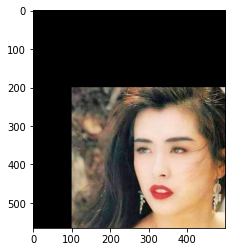

In [24]:
wzx = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg")
h,w = wzx.shape[:2]
x = 100
y = 200
M = np.float32([[1,0,x],[0,1,y]])
move = cv2.warpAffine(wzx,M,(w,h))
img_show(move)

### 5.3.2 旋转

In [25]:
# 使用函数cv2.warpAffine()对体香进行旋转时，可以通过函数cv2.getRotationMatrix2D()获取转换矩阵：
# retval = cv2.getRotationMatrix2D(center,angle,scale)
# center：旋转中心点
# angle：旋转角度，正数表示逆时针，负数表示顺时针
# scale：变换尺度（缩放大小）

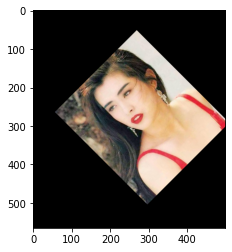

In [27]:
wzx = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg")
h,w = wzx.shape[:2]
M = cv2.getRotationMatrix2D((h/2,w/2),45,0.6)
dst = cv2.warpAffine(wzx,M,(w,h))
img_show(dst)

### 5.3.3 更复杂的仿射变换

In [28]:
# 对于更复杂的仿射变换，opencv提供了函数cv2.getAffineTransform()来生成仿射函数cv2.warpAffine()所使用的转换矩阵M：
# retval = cv2.getAffineTransform(src,dst)
# src：代表输入图像的三个点坐标
# dst：代表输出图像的三个点坐标

# 该函数中，参数src和dst是包含三个二维数组（x，y）点的数组。上述参数通过函数cv2.getAffineTransform()定义了两个平行四边形。
# src和dst中的三个点分别对应平行四边形的左上角，右上角，左下角三个点，
# 函数cv2.warpAffine()函数cv2.getAffineTransform()获取转换矩阵M为参数，将src中的点映射到dst中
# 函数cv2.getAffineTransform()对指定的点完成映射后，将所有其他点的映射关系按照指定点的关系计算确定

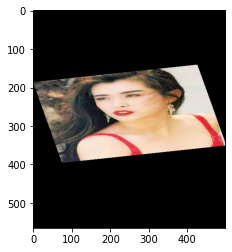

In [29]:
wzx = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg")
h,w = wzx.shape[:2]
p1 = np.float32([[0,0],[w-1,0],[0,h-1]])
p2 = np.float32([[0,h*0.33],[w*0.85,h*0.25],[w*0.15,h*0.7]])
M = cv2.getAffineTransform(p1,p2)
dst = cv2.warpAffine(wzx,M,(w,h))
img_show(dst)

# 5.4 透视

In [31]:
# 5.3讲的仿射变换可以将矩形映射为任意平行四边形，透视则可将矩形映射为任意四边形

# 透视通过函数cv2.warpPerspective()实现：
# dst = cv2.warpPerspective(src,M,dsize[,flags[,borderMode[,borderValue]]])
# dst：透视后的图像，与原图像同类型，大小由参数dsize确定
# M：3*3的变换矩阵
# dsize：输出图像大小
# flags：插值方法，默认INTER_LINEAR，当置为WAEP_INVERSE_MAP时，意味着M是逆变换类型，实现图像从dst到src的逆变换，见书P106
# borderMode：边类型，默认BORDER_CONSTANT，当值为BORDER_TRANSARENT时，意味着目标图像内值不做改变，这些值对应原始图像内的异常值
# borderValue：边界值，默认为0

# 与仿射变换一样，可用一个函数来生成函数cv2.warpPerspective()所使用的变换矩阵M：
# retval = cv2.getPerspectiveTransform(src,dst)
# src：输入图像的四个顶点坐标
# dst：输出图像的四个顶点坐标
# 注意：src和dst是包含四个点的数组，实际使用中，可以根据需要控制src中的四个点映射到dst中的四个点

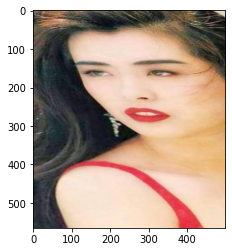

In [33]:
wzx = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg")
h,w = wzx.shape[:2]
p1 = np.float32([[150,50],[400,50],[60,450],[310,450]])
p2 = np.float32([[50,50],[h-50,50],[50,w-50],[h-50,w-50]])
M = cv2.getPerspectiveTransform(p1,p2)
dst = cv2.warpPerspective(wzx,M,(w,h))
img_show(dst)

# 5.5 重映射

In [34]:
# 重映射：把一幅图像内的像素点放置到另一幅图像内的指定位置
# opencv内的重映射函数cv2.remap()提供了更方便，更自由的映射方式：
# dst = cv2.remap(src,map1,map2,interpolation[,borderMode[,borderValue]])
# dst：目标图像，与src同类型，同大小
# src：原始图像
# map1：有两种可能值：1表示(x,y)点的一个映射；2表示CV_16SC2，CV_32FC1，CV_32FC2类型(x,y)点的x值
# map2：同样有两种可能值：1当map1表示(x,y)时，该值为空；2当map1表示(x,y)点的x值时，该值是CV_16UC1，CV_32FC1类型(x,y)点的y值
# interpolation：插值方式，这里不支持INTER_AREA方法
# borderMode：边界模式，当值为BORDER_TRANSPARENT时，表示目标图像内的对应原图像内奇异点（outliers）的像素值不会被修改
# borderValue：边界值，默认为0

### 5.5.1 映射参数的理解

In [35]:
# 重映射通过修改像素点的位置得到一幅新图像
# 映射函数的作用是查找新图像像素在原图像内的位置，该过程是将新图像像素映射到原图像，称为反向映射
# cv2.remap()中，参数map1和map2用来说明反向映射，map1针对坐标x，map2针对坐标y
# 需说明：map1和map2都是浮点数，意味着图像可以映射回原图像两个像素中间的位置，这时可采用不同方法实现插值，interpolation可控制插值
# 正是由于map1和map2的值是浮点数，所以通过cv2.remap()所实现的映射关系变得更加随意，可通过自定义映射参数实现不同形式的映射
# 注意：map1指代像素点所在位置的列号，map2指代像素点所在位置的行号
# 例如，想将目标图某点A映射为原图内处于0行3列的像素点B，则需将A点对应的参数map1对应位置上值设为3，map2对应位置上值设为0
# 为方便理解，通常将map1写为mapx，map2写为mapy

In [38]:
# 将目标数组内的所有像素点都映射为原始图像内第0行第3列上的像素点
img = np.random.randint(0,255,size=[4,5],dtype=np.uint8)
h,w = img.shape[:2]
mapx = np.ones(img.shape,np.float32)*3
mapy = np.ones(img.shape,np.float32)*0
rst = cv2.remap(img,mapx,mapy,cv2.INTER_LINEAR)
print("img\n",img)
print("mapx\n",mapx)
print("mapy\n",mapy)
print("rst\n",rst)

img
 [[214 105 114  71  26]
 [ 14 197 223 141 163]
 [ 67 202 197   3 151]
 [ 41  11  88  27 139]]
mapx
 [[3. 3. 3. 3. 3.]
 [3. 3. 3. 3. 3.]
 [3. 3. 3. 3. 3.]
 [3. 3. 3. 3. 3.]]
mapy
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
rst
 [[71 71 71 71 71]
 [71 71 71 71 71]
 [71 71 71 71 71]
 [71 71 71 71 71]]


### 5.5.2 复制

In [45]:
# 为更好地理解重映射函数cv2.remap()的使用方法，这里实现图像复制
img = np.random.randint(0,255,size=[4,5],dtype=np.uint8)
w,h = img.shape[:2]
mapx = np.zeros(img.shape,np.float32)
mapy = np.zeros(img.shape,np.float32)
for i in range(w):
    for j in range(h):
        mapx.itemset((i,j),j)
        mapy.itemset((i,j),i)
rst = cv2.remap(img,mapx,mapy,cv2.INTER_LINEAR)
print("img\n",img)
print("mapx\n",mapx)
print("mapy\n",mapy)
print("rst\n",rst)

img
 [[164 198 216 128 104]
 [  4  57  45  23  46]
 [123 106  19 132 157]
 [182 118   8 222 125]]
mapx
 [[0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]]
mapy
 [[0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3.]]
rst
 [[164 198 216 128 104]
 [  4  57  45  23  46]
 [123 106  19 132 157]
 [182 118   8 222 125]]


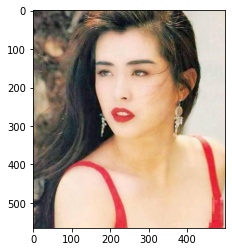

In [84]:
# 使用cv2.remap()完成图像复制
wzx = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg")
h,w = wzx.shape[:2]
mapx = np.zeros(wzx.shape[:2],np.float32)
mapy = np.zeros(wzx.shape[:2],np.float32)
for i in range(h):
    for j in range(w):
        mapx.itemset((i,j),j)
        mapy.itemset((i,j),i)
dst = cv2.remap(wzx,mapx,mapy,cv2.INTER_LINEAR)
img_show(dst)

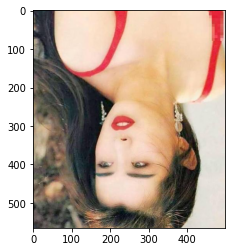

In [80]:
# 使用cv2.remap()实现图像绕x轴翻转
wzx = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg")
h,w = wzx.shape[:2]
mapx = np.zeros(wzx.shape[:2],np.float32)
mapy = np.zeros(wzx.shape[:2],np.float32)
for i in range(h):
    for j in range(w):
        mapx.itemset((i,j),j)
        mapy.itemset((i,j),h-i-1)
dst = cv2.remap(wzx,mapx,mapy,cv2.INTER_LINEAR)
img_show(dst)

### 5.5.4 绕y轴翻转

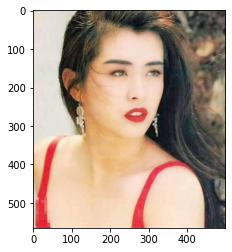

In [85]:
# y轴值不变，x轴值变为：总列数-1-当前列号
wzx = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg")
h,w = wzx.shape[:2]
mapx = np.zeros(wzx.shape[:2],np.float32)
mapy = np.zeros(wzx.shape[:2],np.float32)
for i in range(h):
    for j in range(w):
        mapx.itemset((i,j),w-1-j)
        mapy.itemset((i,j),i)
dst = cv2.remap(wzx,mapx,mapy,cv2.INTER_LINEAR)
img_show(dst)

### 5.5.5 绕x轴y轴翻转

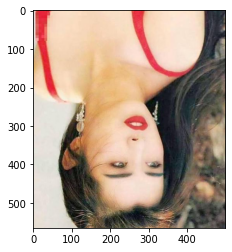

In [86]:
# x轴值：总列数-1-当前列号
# y轴值：总行数-1-当前行号
wzx = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg")
h,w = wzx.shape[:2]
mapx = np.zeros(wzx.shape[:2],np.float32)
mapy = np.zeros(wzx.shape[:2],np.float32)
for i in range(h):
    for j in range(w):
        mapx.itemset((i,j),w-1-j)
        mapy.itemset((i,j),h-1-i)
dst = cv2.remap(wzx,mapx,mapy,cv2.INTER_LINEAR)
img_show(dst)

### 5.5.6 x轴y轴互换

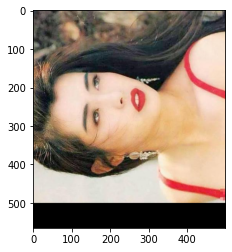

In [88]:
# mapx的值调整为所在行的行号
# mapy的值调整为所在列的列号
wzx = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg")
h,w = wzx.shape[:2]
mapx = np.zeros(wzx.shape[:2],np.float32)
mapy = np.zeros(wzx.shape[:2],np.float32)
for i in range(h):
    for j in range(w):
        mapx.itemset((i,j),i)
        mapy.itemset((i,j),j)
dst = cv2.remap(wzx,mapx,mapy,cv2.INTER_LINEAR)
img_show(dst)

### 5.5.7 图像缩放

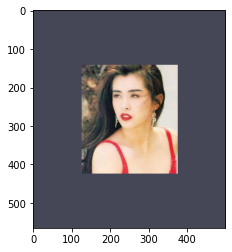

In [91]:
# 缩小图像后，可以将图像固定在围绕其中心的某个区域
# 1.在目标图像的x轴（0.25*x，0.75*x）区间内生成缩小图像，x轴其余区域的点取样x轴上任意一点的值
# 1.在目标图像的y轴（0.25*y，0.75*y）区间内生成缩小图像，y轴其余区域的点取样x轴上任意一点的值
# 为方便处理，此处任意一点值统一为0
wzx = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg")
h,w = wzx.shape[:2]
mapx = np.zeros(wzx.shape[:2],np.float32)
mapy = np.zeros(wzx.shape[:2],np.float32)
for i in range(h):
    for j in range(w):
        if (0.25*h < i < 0.75*h) and (0.25*w < j < 0.75*w):
            mapx.itemset((i,j),2*(j-w*0.25)+0.5)
            mapy.itemset((i,j),2*(i-h*0.25)+0.5)
        else:
            mapx.itemset((i,j),0)
            mapy.itemset((i,j),0)
dst = cv2.remap(wzx,mapx,mapy,cv2.INTER_LINEAR)
img_show(dst)